<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

# Import and Dataset

In [42]:
#Start Here
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel

import spacy

import pandas as pd

In [43]:
# present working directory
%pwd

'C:\\Users\\avery\\Lambda\\Unit4\\Sprint1\\DS-Unit-4-Sprint-1-NLP\\module4-topic-modeling'

In [44]:
df = pd.read_csv('../module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [45]:
print(df.shape)
df.head(2)

(28332, 24)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."


In [46]:
# View Categories
df['primaryCategories'].value_counts()

Electronics                    13995
Health & Beauty                12071
Toys & Games,Electronics        1676
Office Supplies,Electronics      386
Electronics,Media                185
Office Supplies                    9
Animals & Pet Supplies             6
Electronics,Furniture              2
Home & Garden                      2
Name: primaryCategories, dtype: int64

In [47]:
# Selecting Health & Beauty to look at reviews
df = df[df['primaryCategories'] == 'Health & Beauty'].copy()
print(df.shape)
df.head(1)

(12071, 24)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."


# Use Spacy to Tokenize 

In [48]:
from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [49]:
# for doc in tokenizer.pipe(df['reviews.text'], batch_size=500):
    
#     for token in doc:
#         print(token.text, token.lemma_, token.is_stop)


In [50]:
STOP_WORDS = nlp.Defaults.stop_words.union(["amazon","battery","duracell","batteries.","batteries,","batteries","price."])

In [51]:
tokens = []

for doc in tokenizer.pipe(df['reviews.text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) and (token.is_punct == False):
            doc_tokens.append(token.lemma_.lower())
            
    tokens.append(doc_tokens)
        
df['tokens'] = tokens

In [52]:
df['tokens'].head()

0    [order, 3, item, bad, quality., miss, backup, ...
1                [bulk, expensive, way, product, like]
2                                      [price, happy.]
3                           [work, brand, well, price]
4                          [long, last, price, great.]
Name: tokens, dtype: object

In [53]:
len(df['tokens'][0])

11

# Create id2word

In [54]:
# Gensim dictionary
id2word = Dictionary(df['tokens'])
print(len(id2word))

9803


In [55]:
print(id2word[106])
print(id2word[5000])
print(id2word[204])

day
savings!
thanks..


In [56]:
# Remove extreme values from the dataset
#id2word.filter_extremes(no_below=5, no_above=0.95)

In [57]:
print(len(id2word))

9803


# Create Corpus Object

In [58]:
# doc to bag of words
corpus = [id2word.doc2bow(token) for token in df['tokens']]

In [59]:
len(corpus) 

12071

In [60]:
len(corpus[0])

11

In [61]:
corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1)]

In [62]:
# LDA MODEL
lda_model = LdaMulticore(
    corpus=corpus, 
    num_topics=5, 
    id2word=id2word, 
    workers=4, 
    passes=5)

In [63]:
lda_model.print_topics()

[(0,
  '0.019*"buy" + 0.015*"good" + 0.010*"product" + 0.009*"use" + 0.008*"need" + 0.007*"come" + 0.007*"work" + 0.007*"don\'t" + 0.006*"box" + 0.006*"i\'m"'),
 (1,
  '0.058*"great" + 0.022*"work" + 0.020*"value" + 0.019*"good" + 0.013*"price" + 0.011*"price!" + 0.011*"aa" + 0.009*"long" + 0.008*"deal" + 0.008*"fast"'),
 (2,
  '0.056*"great" + 0.047*"long" + 0.027*"price" + 0.019*"buy" + 0.016*"good" + 0.012*"brand" + 0.011*"last" + 0.010*"use" + 0.010*"time" + 0.009*"like"'),
 (3,
  '0.054*"good" + 0.048*"work" + 0.027*"brand" + 0.018*"price" + 0.015*"long" + 0.014*"buy" + 0.013*"great" + 0.012*"like" + 0.010*"love" + 0.010*"well"'),
 (4,
  '0.019*"buy" + 0.014*"great" + 0.012*"quality" + 0.012*"good" + 0.008*"life" + 0.007*"i\'m" + 0.007*"need" + 0.007*"work" + 0.006*"use" + 0.006*"time"')]

In [64]:
# pretty print
import re
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda_model.print_topics()]
topics = [' '.join(t[0:5]) for t in words]

for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
buy good product use need

------ Topic 1 ------
great work value good price

------ Topic 2 ------
great long price buy good

------ Topic 3 ------
good work brand price long

------ Topic 4 ------
buy great quality good life



# Topic Distance Visualization

In [65]:
distro = [lda_model[d] for d in corpus]
num_topics = 4

def update(doc):
        d_dist = {k:0 for k in range(0,num_topics)}
        for topic in doc:
            # Topic is Tuple where the first part is the topic id
            # the second part is the topic distribution in that doc
            d_dist[topic[0]] = topic[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [66]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.019549 -0.057671       1        1  26.398584
2      0.038820 -0.057405       2        1  26.353333
0     -0.085688 -0.029555       3        1  17.820724
1      0.097711  0.065461       4        1  15.964129
4     -0.070392  0.079169       5        1  13.463226, topic_info=      Term         Freq        Total Category  logprob  loglift
70   great  3052.000000  3052.000000  Default  30.0000  30.0000
20    work  1942.000000  1942.000000  Default  29.0000  29.0000
23    long  1885.000000  1885.000000  Default  28.0000  28.0000
585  value   408.000000   408.000000  Default  27.0000  27.0000
61    good  2618.000000  2618.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
18   brand    67.972755  1308.809326   Topic5  -5.2930  -0.9526
484   it's    47.080608   269.713623   Topic5  -5.6602   0.2597
13    like    53.371273   747.966003   Topic5  -5.5348  -0.6349
17   price    56.366859  1534.098145   Topic5  -5.4802  -1.2986
98    love    48.003929   501.759369   Topic5  -5.6408  -0.3416

[426 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
6120      5  0.808122           (2
4575      2  0.875862          (as
2954      4  0.800949  (energizers
161       1  0.163791            2
161       2  0.232354            2
...     ...       ...          ...
113       5  0.005842         year
349       1  0.075473         you.
349       2  0.113210         you.
349       4  0.679261         you.
349       5  0.113210         you.

[957 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2, 5])

# Visualization

In [67]:
topics = pd.DataFrame.from_records(new_distro)
topics.head()

,0,1,2,3,4
0,0.439194,0.017457,0.335514,0.092318,0.115517
1,0.034398,0.034097,0.863531,0.034174,0.033799
2,0.068828,0.067164,0.728426,0.068745,0.066837
3,0.040255,0.040591,0.040738,0.838122,0.040295
4,0.040673,0.040469,0.617287,0.261475,0.040096


In [68]:
df['primaryTopic'] = topics.idxmax(axis=1)
df[['primaryTopic', 'reviews.rating']].groupby('primaryTopic').mean()

,reviews.rating
primaryTopic,
0.0,4.080054
1.0,4.609746
2.0,4.471530
3.0,4.534852
4.0,4.271144


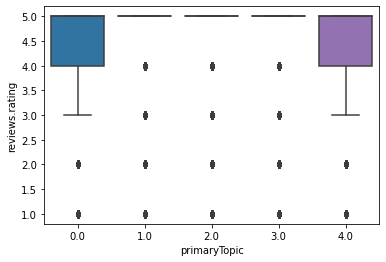

In [69]:
import seaborn as sns

ax = sns.boxplot(x="primaryTopic", y="reviews.rating",
                 data=df)

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling

In [91]:
text = "The National Park Service (NPS) has announced the temporary closure of Gateway Arch National Park, which includes the Gateway Arch and Old Courthouse, beginning Wednesday, March 18 until further notice due to the evolving COVID-19 health situation. The health and safety of visitors, employees, volunteers, and partners is the park’s number one priority. NPS is working with federal, state, and local authorities to closely monitor this rapidly changing situation. When appropriate, Gateway Arch National Park will notify the public when it resumes full operations via traditional media, as well as online at nps.gov/jeff and gatewayarch.com and on social media (@GatewayArchNPS)."

doc = nlp(text)

In [92]:
# Iterate over the entities
for ent in doc.ents:
    # Print the entity text and label
    print(ent.text, ent.label_)

The National Park Service ORG
NPS ORG
Gateway Arch National Park FAC
the Gateway Arch and Old Courthouse FAC
Wednesday, March 18 DATE
number one CARDINAL
NPS ORG
Gateway Arch National Park FAC
@GatewayArchNPS ORG


In [93]:
print("ORG:", spacy.explain("ORG"))
print("FAC:",spacy.explain("FAC"))
print("DATE:",spacy.explain("DATE"))
print("CARDINAL:",spacy.explain("CARDINAL"))

ORG: Companies, agencies, institutions, etc.
FAC: Buildings, airports, highways, bridges, etc.
DATE: Absolute or relative dates or periods
CARDINAL: Numerals that do not fall under another type
